# Principal Component Analysis for Customer Base 

Welcome to my notebook, where we will be using Principal Component Analysis with SKlearn in Python to gain a better understanding of the purchasing patterns of consumption in the Dram Shop. We will be utilizing Google BigQuery and SQL to extract the data for our sample, which contains a large number of features to enable us to gain valuable insights into consumer behavior.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_gbq
import os

from sklearn.decomposition import PCA
from google.cloud import bigquery
from google.oauth2 import service_account

# Connecting to Google BigQuery

In [2]:
##                                                       ###
## This information has been cleared to protect privacy. ###
##       

service_path =
service_file =    
gbq_proj_id =   
dataset_id = 

# And this should stay the same. 
private_key = service_path + service_file

In [3]:
# Now we pass in our credentials so that Python has permission to access our project.
credentials = service_account.Credentials.from_service_account_file(service_path + service_file)

In [4]:
# And finally we establish our connection
client = bigquery.Client(credentials = credentials, project=gbq_proj_id)

# Pull Data From GBQ
This query accesses my data set that is on Google BigQuery. You can see the data for our `gross_sales` was uploaded as a string. This was casted back into numeric value here. This can be solved by reuploading as a numeric in another instance.

In [6]:
top_gross_sales = """SELECT original.customer_id as customer_id,
                itl.beverage as beverage,
                SUM(CAST(gross_sales as numeric)) as gross_sales
            from `albee-msba.dram_shop.dram_items_*` as original
            INNER JOIN `albee-msba.dram_shop.item_lookup_updated` as itl on itl.item = original.item
            where beverage in (SELECT itl.beverage,
                              from `albee-msba.dram_shop.dram_items_*` as og
                              INNER JOIN `albee-msba.dram_shop.item_lookup_updated` as itl on itl.item = og.item
                              group by itl.beverage, gross_sales
                              order by gross_sales DESC
                              LIMIT 1000)
            and customer_id IS NOT NULL
            and itl.beverage != "custom amount"
            group by customer_id, itl.beverage
            order by gross_sales DESC;
            """

customers_top_1000_bevs = pandas_gbq.read_gbq(top_gross_sales,project_id = gbq_proj_id)

Downloading: 100%|█████████████████| 147123/147123 [00:05<00:00, 25912.28rows/s]


## Pivot Function
Using the pandas function `pivot`, pivot the data into a "wide" format with customer IDs as the rows and beverages as the items. You can see an example 

In [30]:
df_pivot = customers_top_1000_bevs.pivot(index = 'customer_id',columns = 'beverage',values = 'gross_sales').fillna(0)

In [31]:
df_pivot.head(10)

beverage,$3 draught works yo!,$3 great burn yo!,$6 token,- great burn,- head full of fresh hops 16oz can,"- lawyers, guns, and money",- robot panda hazy ipa,- summer ale,00 wine tasting!,0017p powder hound -,...,yaakity yak,yamabiko rice lager,yard sale amber,yellow snow,"z crazy mt. - lawyers, guns, and money",z dunkertons dry organic cider,z raspberry - lockhorn,z western cider mcintosh,z whitetail whit - beaverhead,"z39w les vignerones estezargues ""from the tank"""
customer_id,,,,,,,,,,,,,,,,,,,,,
",",0,0,0,9.000000000,0,0,0,0,30.000000000,0,...,5.500000000,5.000000000,0,23.000000000,0,0,0,0,0,0
", ,",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
", , ,",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
", , , 9YK82GERX11JAP9EE8Q5PW9SBC",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
", , 6JAXPMTP114Y4JQX2TG83JFGQ0",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
", , 85XDD551T95Z4XHVF1TQKFCV2C",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
", , B61BK65Q1D2YQ1543MRXE8PDMW,",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
", , FBC8SYMM9X6BAT939T433N5QAW",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
", , M3PMH9XD4D1F1BE7EDP6FEN6WW,",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# PCA on Dram Shop Top Beverage Sales
This data will represent our case for PCA, with about 1,000 dimensions of gross sales data for each owner. This section used the PCA function from sci-kit learn. 

In [32]:
pca = PCA(n_components=10, svd_solver='full')
pca.fit(df_pivot)

print(pca.explained_variance_ratio_)

[0.53160388 0.14193251 0.02736444 0.02130329 0.0138348  0.01231587
 0.01168527 0.01094826 0.00939847 0.00803405]


## Variance Explained
When working with PCA it is important to look at the explained variance. Our PCA object has two variance statistics: `explained_variance_` and `explained_variance_ratio_`. The former is the variance explained by the component in raw terms, the latter normalizes by the total variance of the data set. We will look at the normalized value for the first 10 components.

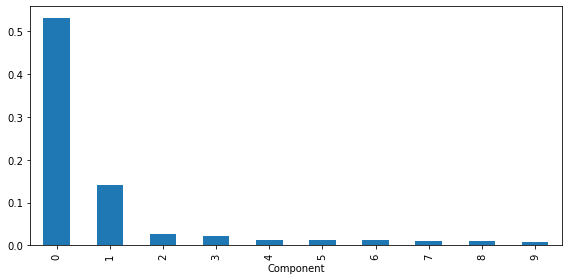

In [33]:
explained_variance = pd.DataFrame(pca.explained_variance_ratio_)
ax = explained_variance.head(20).plot.bar(legend=False, figsize=(8, 4))
ax.set_xlabel('Component')
plt.tight_layout()
plt.show()

We can see that the first component explained a large portion of the variance than the others. The next one explains more than the others as well. After the third component, we see a generally flattend curve on this scale. 

In [50]:
cume_explained_variance = pd.DataFrame(pca.explained_variance_ratio_).cumsum()

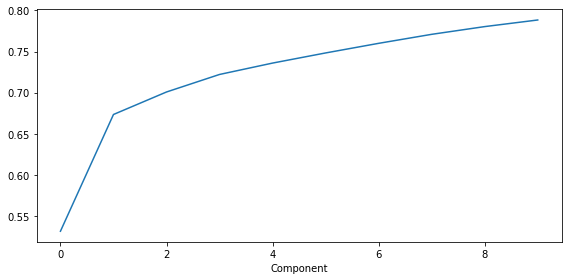

In [51]:
#showing the first value
ax = cume_explained_variance.head(150).plot.line(legend=False, figsize=(8, 4))
ax.set_xlabel('Component')
plt.tight_layout()
plt.show()

We can see that about 80% of our variance is explained by 10 components. 

## Investigate our Loadings
We will examine how the sales of each product affect the linear combination represented by each component. Generally, one can expect to observe both positive and negative values, which indicate a component is contrasting two different types of observations. Especially large values in absolute terms have the greatest influence.

In [53]:
loadings = pd.DataFrame(pca.components_[0:50, :], 
                        columns=df_pivot.columns)
loadings.transpose().sort_values(0).head()

,0,1,2,3,4,5,6,7,8,9
beverage,,,,,,,,,,
build your own flight,-0.000205,-0.000446,0.006316,-0.003426,-0.001217,-0.002478,-0.005435,0.004123,-0.004127,-0.002634
$6 token,-0.000067,-0.000122,-0.000660,-0.000234,-0.001267,0.000746,-0.000453,-0.002110,0.001417,-0.005954
renner sistas super glitzer 2019,-0.000028,-0.000041,0.000904,-0.000058,-0.000367,-0.000346,-0.000259,-0.000232,0.000077,-0.000056
de troch - oude gueuze,-0.000026,-0.000039,0.000202,-0.000201,0.001336,0.003309,0.000462,0.000680,-0.000415,-0.000316
24 duchesse de bourgogne,-0.000025,-0.000142,0.001499,-0.000974,0.008820,-0.003164,-0.004651,0.024099,-0.008596,-0.004135


This display is hard to see patterns and is not very helpful. Let's visaulize this.

/var/folders/np/jf6g_y1x1936njwpvh79lbmc0000gn/T/ipykernel_12451/3536290351.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  pc_loading = loadings.loc[0, :].sort_values(0).tail(n=20)
/var/folders/np/jf6g_y1x1936njwpvh79lbmc0000gn/T/ipykernel_12451/3536290351.py:4: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


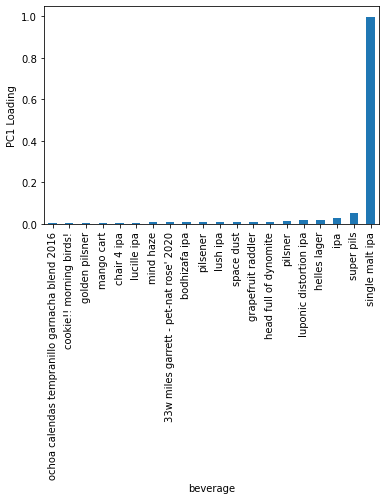

In [54]:
pc_loading = loadings.loc[0, :].sort_values(0).tail(n=20)
pc_loading.plot.bar()
plt.ylabel("PC1 Loading")
plt.tight_layout()
plt.show()

This component has positive loadings for all beverage categories, with the highest being single malt ipa. 

Let's look at the other components.

Before we do that, let's write a function that will plot the component for us. This was developed from [this helpful blog post](https://medium.com/analytics-vidhya/pca-and-how-to-interpret-it-with-python-8aa664f7a69a) and took a lot of time and work to apply it to my project. 

In [35]:
def show_component(component,cutoff=0.05) : 
    
    pc_loading = loadings.transpose().iloc[:,component-1]
    pc_loading = pc_loading.loc[pc_loading.abs() > cutoff].sort_values()
    max_pc = max(pc_loading.abs())
    colors = ['C0' if l > 0 else 'C1' for l in pc_loading]

    pc_loading.plot.bar(color = colors)
    ax = plt.gca()
    plt.axhline(y=0,c="#888888")
    ax.set_ylim(-max_pc, max_pc)
    plt.tight_layout()
    plt.xticks(rotation=45, ha='right')
    plt.show()

### Component One: Single Malt IPA
This is a person who always purhcases the Single Malt IPA. After a little digging, this is the Blackfoot River Single Malt IPA, a local popular beer. 

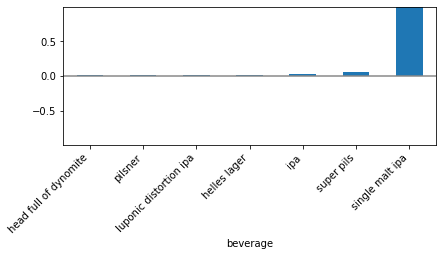

In [61]:
show_component(1,.01)

### Component Two: Popular Pilsner
We could probably assume that the larger listed is a pilsner larger. These customers stick to this group and they do not like the popular IPA. 

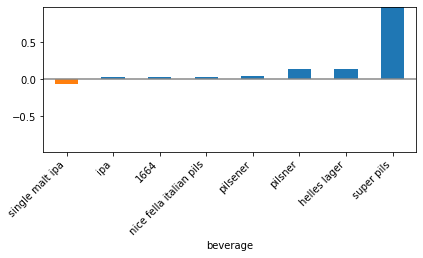

In [59]:
show_component(2,.02)

### Component Three:  High ABV
We have people who love IPA but a chilled red as well. This particular chilled red is 13.5% which is on the higher ABV side. This grouping prefers the IPA, a good red wine and does not like pilsner.

/var/folders/np/jf6g_y1x1936njwpvh79lbmc0000gn/T/ipykernel_12451/1476282274.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


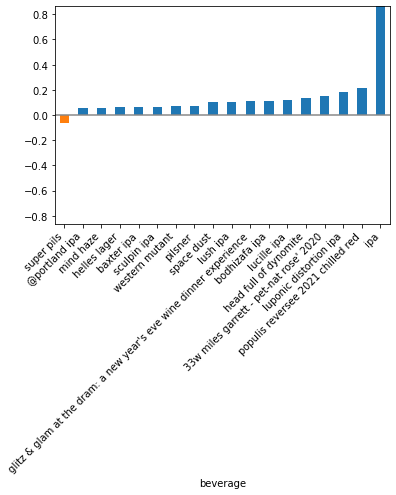

In [38]:
show_component(3,.05)


### Component Four:  Wine Lover
These customers come in for the wine (moreso organice wine.) The Dram Shop features a vast collection of wines that come from rural and small regoins. 

/var/folders/np/jf6g_y1x1936njwpvh79lbmc0000gn/T/ipykernel_12451/1476282274.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


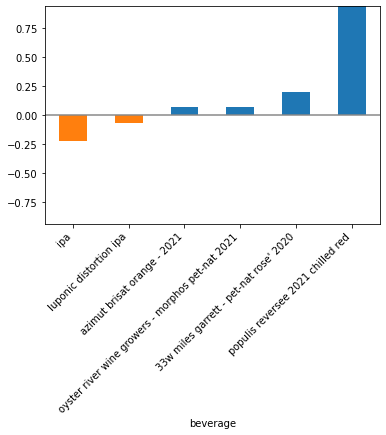

In [39]:
show_component(4,.05)

### Component Five: The Hoppy Hipster
Not limited to only hops, but there for the beers that are not mainstream. There are high fruity flavors and wine blends that they enjoy. This could also be two people (partners) who may share an account. 

/var/folders/np/jf6g_y1x1936njwpvh79lbmc0000gn/T/ipykernel_12451/1476282274.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


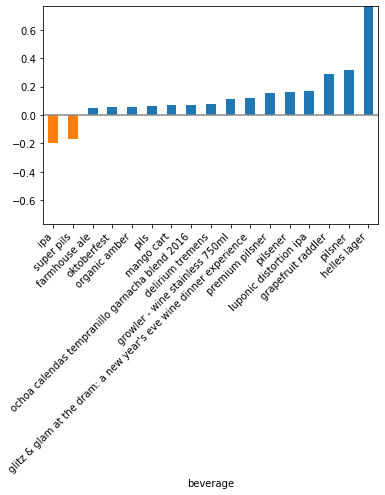

In [40]:
show_component(5,.05)
